In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. big response schemes

https://trends.google.com/trends/explore?date=2018-01-01%202019-11-01&geo=IN&q=%2Fm%2F011q38qv,%2Fm%2F011x4vqy,%2Fg%2F11hd9l6s32,%2Fg%2F11bwdpm983,%2Fm%2F0rfdy4b

2. low response schemes
https://trends.google.com/trends/explore?date=2018-01-01%202019-11-01&geo=IN&q=%2Fm%2F011q38qv,%2Fg%2F11bwdsd9zl,%2Fm%2F01370qtb,%2Fg%2F11c54xt5hj,%2Fg%2F11f3cxyyh8

In [2]:
df = pd.read_csv('data/schemes_01.csv')
df.head()

,Week,jan_dhan,mudra_yojana,jeevan_jyoti_bima,ujjwala_yojana,sahaj_bijli_saubhagya
0,2018-01-07,36,24,20,26,12
1,2018-01-14,42,26,23,22,14
2,2018-01-21,56,30,16,29,15
3,2018-01-28,49,41,36,40,16
4,2018-02-04,38,41,25,31,13


In [3]:
df1 = pd.read_csv('data/schemes_02.csv')
df1.head()

,Week,jan_dhan_yojana_01,swachh_bharat,ayushman_bharat,awas_yojana,matritva_vandana
0,2018-01-07,3,41,<1,34,1
1,2018-01-14,3,40,<1,36,2
2,2018-01-21,4,41,<1,32,2
3,2018-01-28,4,36,2,42,2
4,2018-02-04,3,35,2,36,3


In [4]:
df1.replace('<1', 0, inplace=True)
# Low counts, less than 1 are downloaded as a string '<1'; that is replaced by 0

In [5]:
df = df.merge(df1)

In [6]:
normalisation = df['jan_dhan']/df['jan_dhan_yojana_01']
for col in df1.columns:
    if 'Week' not in col:
        df[col] = normalisation * df1[col].astype(float)
del df['jan_dhan_yojana_01']

In [7]:
df.head()

,Week,jan_dhan,mudra_yojana,jeevan_jyoti_bima,ujjwala_yojana,sahaj_bijli_saubhagya,swachh_bharat,ayushman_bharat,awas_yojana,matritva_vandana
0,2018-01-07,36,24,20,26,12,492.000000,0.000000,408.0,12.0
1,2018-01-14,42,26,23,22,14,560.000000,0.000000,504.0,28.0
2,2018-01-21,56,30,16,29,15,574.000000,0.000000,448.0,28.0
3,2018-01-28,49,41,36,40,16,441.000000,24.500000,514.5,24.5
4,2018-02-04,38,41,25,31,13,443.333333,25.333333,456.0,38.0


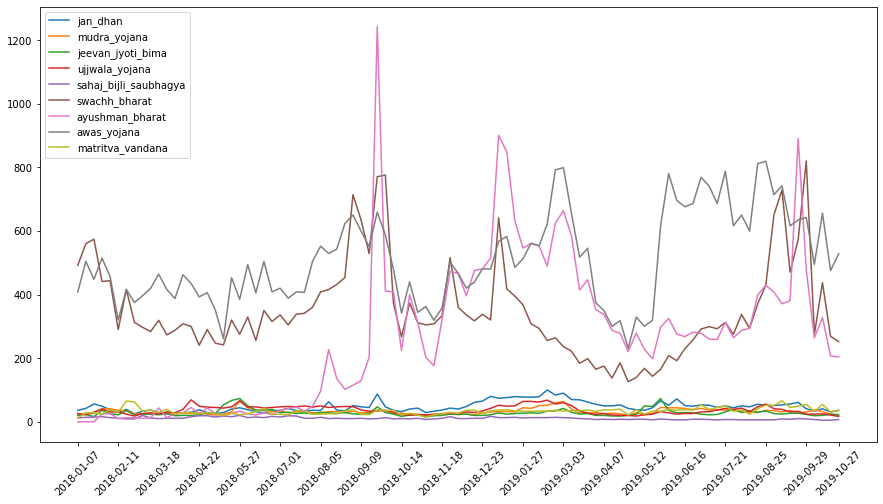

In [8]:
x = df['Week']


cols = df.columns[1:]
y1  = df['awas_yojana']
y2 = df['matritva_vandana']

xticks = [tick for tick in x[::5]]
xticks.append(x[len(x)-1])
plt.figure(figsize=(15,8))
for col in cols:
    plt.plot(x, df[col], label=col)
# plt.plot(x, df[cols[2]], label=col[2])
# plt.plot(x, df[cols[1]], label=col[1])
plt.xticks(xticks, rotation="45")
plt.legend()

In [9]:
high_search = ['ayushman_bharat', 'awas_yojana', 'swachh_bharat']

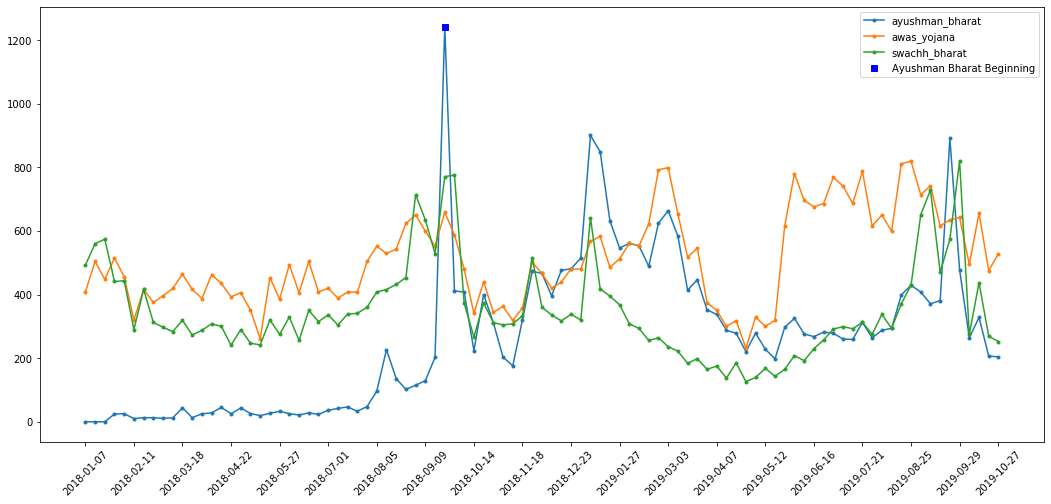

In [10]:
x = df['Week']

xticks = [tick for tick in x[::5]]
xticks.append(x[len(x)-1])
plt.figure(figsize=(18,8))
for col in high_search:
    plt.plot(x, df[col], '.-', label=col)
plt.plot('2018-09-23', 1240, 'bs', label='Ayushman Bharat Beginning')
plt.xticks(xticks, rotation="45")
plt.legend()
plt.savefig('data/high_search.png')

In [11]:
medium_search = ['jan_dhan', 'mudra_yojana', 'ujjwala_yojana']

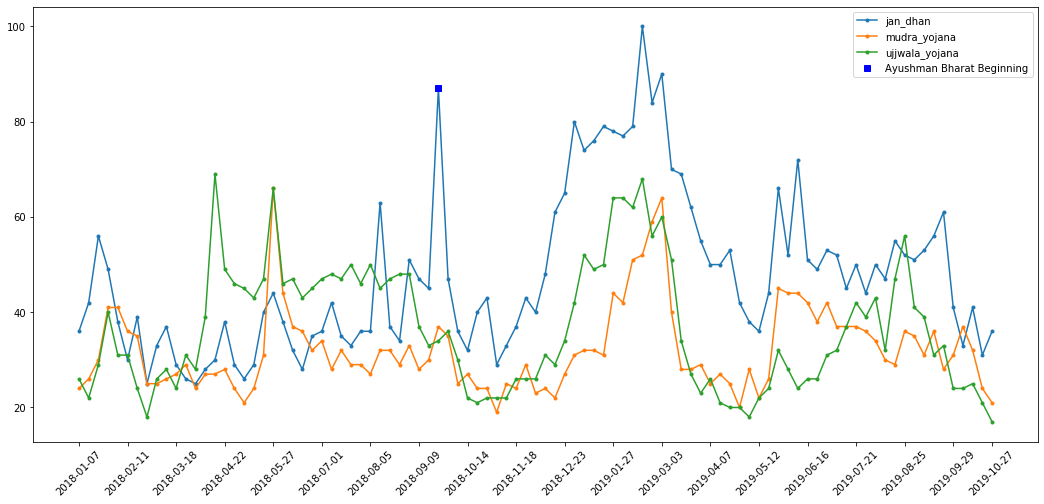

In [12]:
x = df['Week']

xticks = [tick for tick in x[::5]]
xticks.append(x[len(x)-1])
plt.figure(figsize=(18,8))
for col in medium_search:
    plt.plot(x, df[col], '.-', label=col)
plt.plot('2018-09-23', 87, 'bs', label='Ayushman Bharat Beginning')
plt.xticks(xticks, rotation="45")
plt.legend()
plt.savefig('data/medium_search.png')

In [13]:
low_search = []
for col in cols:
    if col not in high_search and col not in medium_search:
        low_search.append(col)

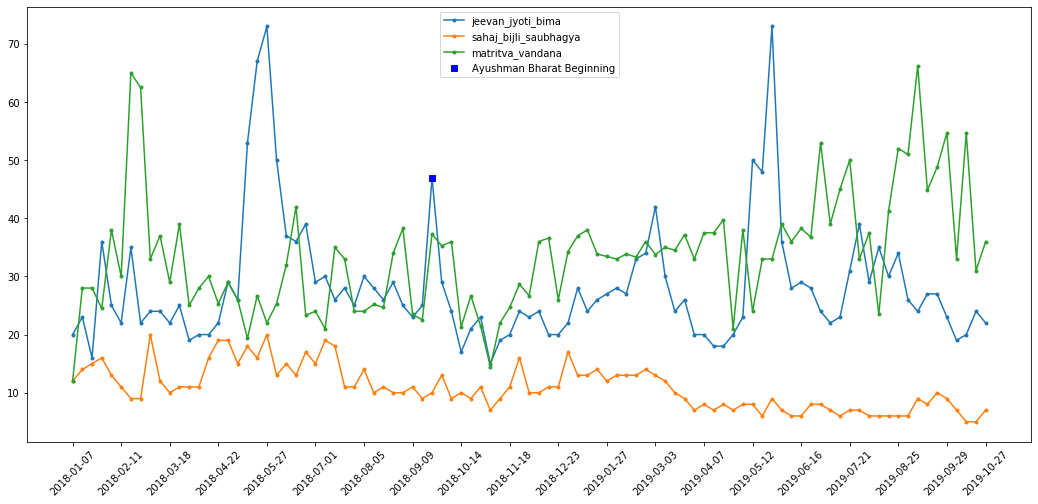

In [14]:
x = df['Week']

xticks = [tick for tick in x[::5]]
xticks.append(x[len(x)-1])
plt.figure(figsize=(18,8))
for col in low_search:
    plt.plot(x, df[col], '.-', label=col)
plt.plot('2018-09-23', 47, 'bs', label='Ayushman Bharat Beginning')
plt.xticks(xticks, rotation="45")
plt.legend()
plt.savefig('data/low_search.png')

In [15]:
low_search

['jeevan_jyoti_bima', 'sahaj_bijli_saubhagya', 'matritva_vandana']